In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

/home/kipkosgeii/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
new_data = pd.read_csv('new_data.csv')

new_data.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,6,365
1,40.75362,-73.98377,225,1,45,2,355
2,40.80902,-73.94190,150,3,0,1,365
3,40.68514,-73.95976,89,1,270,1,194
4,40.79851,-73.94399,80,10,9,1,0


In [4]:
# read info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   calculated_host_listings_count  48895 non-null  int64  
 6   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.6 MB


In [5]:
new_data.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
new_data.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [11]:
x = new_data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']]

y = new_data[ 'price']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

In [14]:
# instatciate
model = LinearRegression()

In [16]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
print(model.coef_)
print(model.intercept_)

[ 1.99937544e+02 -8.42666395e+02  9.74645792e-02 -2.86487090e-01
  7.38253057e-02  1.78655833e-01]
-70321.2508043435


In [28]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
latitude,199.937544
longitude,-842.666395
minimum_nights,0.097465
number_of_reviews,-0.286487
calculated_host_listings_count,0.073825
availability_365,0.178656


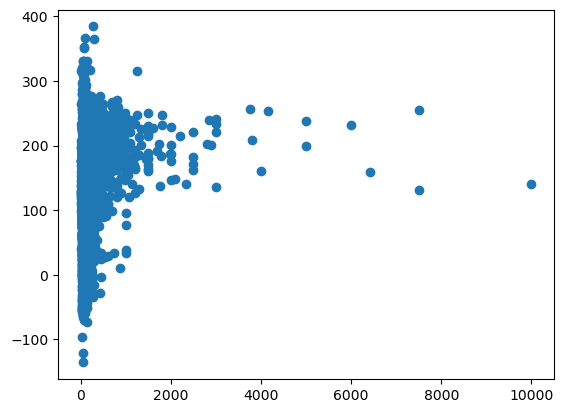

In [32]:
predictions= model.predict(x_test)

plt.scatter(y_test, predictions)

plt.show()

In [34]:
mean= metrics.mean_absolute_error(y_test, predictions)
mean

86.38361449649352

In [35]:
mse = metrics.mean_squared_error(y_test, predictions)
mse

49294.85879342341

In [37]:
rmse= np.sqrt(mse)
rmse

222.02445539494835